In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from math import pi

## Carga y limpieza de datos

In [93]:
def clean(anio):
    df=pd.read_excel("Saberpro16.xlsx", sheet_name=anio)
    df1=df
    df1=df1.dropna(how='any')

    x1 = df1['MOD_RAZONA_CUANTITAT_PUNT'].mean()
    df['MOD_RAZONA_CUANTITAT_PUNT'].fillna(x1,inplace=True)
    
    x1 = df1['MOD_RAZONA_CUANTITAT_DESEM'].mode()
    df['MOD_RAZONA_CUANTITAT_DESEM'].fillna(x1,inplace=True)
    
    x2 = df1['MOD_LECTURA_CRITICA_PUNT'].mean()
    df['MOD_LECTURA_CRITICA_PUNT'].fillna(x2,inplace=True)

    x2 = df1['MOD_LECTURA_CRITICA_DESEM'].mode()
    df['MOD_LECTURA_CRITICA_DESEM'].fillna(x2,inplace=True)
    
    x3 = df1['MOD_COMPETEN_CIUDADA_PUNT'].mean()
    df['MOD_COMPETEN_CIUDADA_PUNT'].fillna(x3,inplace=True)
    
    x3 = df1['MOD_COMPETEN_CIUDADA_DESEM'].mode()
    df['MOD_COMPETEN_CIUDADA_DESEM'].fillna(x3,inplace=True)
    
    x4 = df1['MOD_INGLES_PUNT'].mean()
    df['MOD_INGLES_PUNT'].fillna(x4,inplace=True)
    
    x4 = df1['MOD_INGLES_DESEM'].mode()
    df['MOD_INGLES_DESEM'].fillna(x4,inplace=True)
    
    x5 = df1['MOD_COMUNI_ESCRITA_PUNT'].mean()
    df['MOD_COMUNI_ESCRITA_PUNT'].fillna(x5,inplace=True)

    x5 = df1['MOD_COMUNI_ESCRITA_DESEM'].mode()
    df['MOD_COMUNI_ESCRITA_DESEM'].fillna(int(x5),inplace=True)

    return df

df_2016=clean('2016')
df_2017=clean('2017')
df_2018=clean('2018')
df_2019=clean('2019')


In [94]:
def calculate_mean(df,column_name):
    return df[column_name].mean()

razonamiento='MOD_RAZONA_CUANTITAT_PUNT'
lectura='MOD_LECTURA_CRITICA_PUNT'
ciudadana='MOD_COMPETEN_CIUDADA_PUNT'
ingles='MOD_INGLES_PUNT'
comunicacion='MOD_COMUNI_ESCRITA_PUNT'

p_raz_16=calculate_mean(df_2016,razonamiento)
p_lec_16=calculate_mean(df_2016,lectura)
p_ciu_16=calculate_mean(df_2016,ciudadana)
p_ing_16=calculate_mean(df_2016,ingles)
p_com_16=calculate_mean(df_2016,comunicacion)

p_raz_17=calculate_mean(df_2017,razonamiento)
p_lec_17=calculate_mean(df_2017,lectura)
p_ciu_17=calculate_mean(df_2017,ciudadana)
p_ing_17=calculate_mean(df_2017,ingles)
p_com_17=calculate_mean(df_2017,comunicacion)

p_raz_18=calculate_mean(df_2018,razonamiento)
p_lec_18=calculate_mean(df_2018,lectura)
p_ciu_18=calculate_mean(df_2018,ciudadana)
p_ing_18=calculate_mean(df_2018,ingles)
p_com_18=calculate_mean(df_2018,comunicacion)

p_raz_19=calculate_mean(df_2019,razonamiento)
p_lec_19=calculate_mean(df_2019,lectura)
p_ciu_19=calculate_mean(df_2019,ciudadana)
p_ing_19=calculate_mean(df_2019,ingles)
p_com_19=calculate_mean(df_2019,comunicacion)

## Gráfica de barras variables cuantitativas

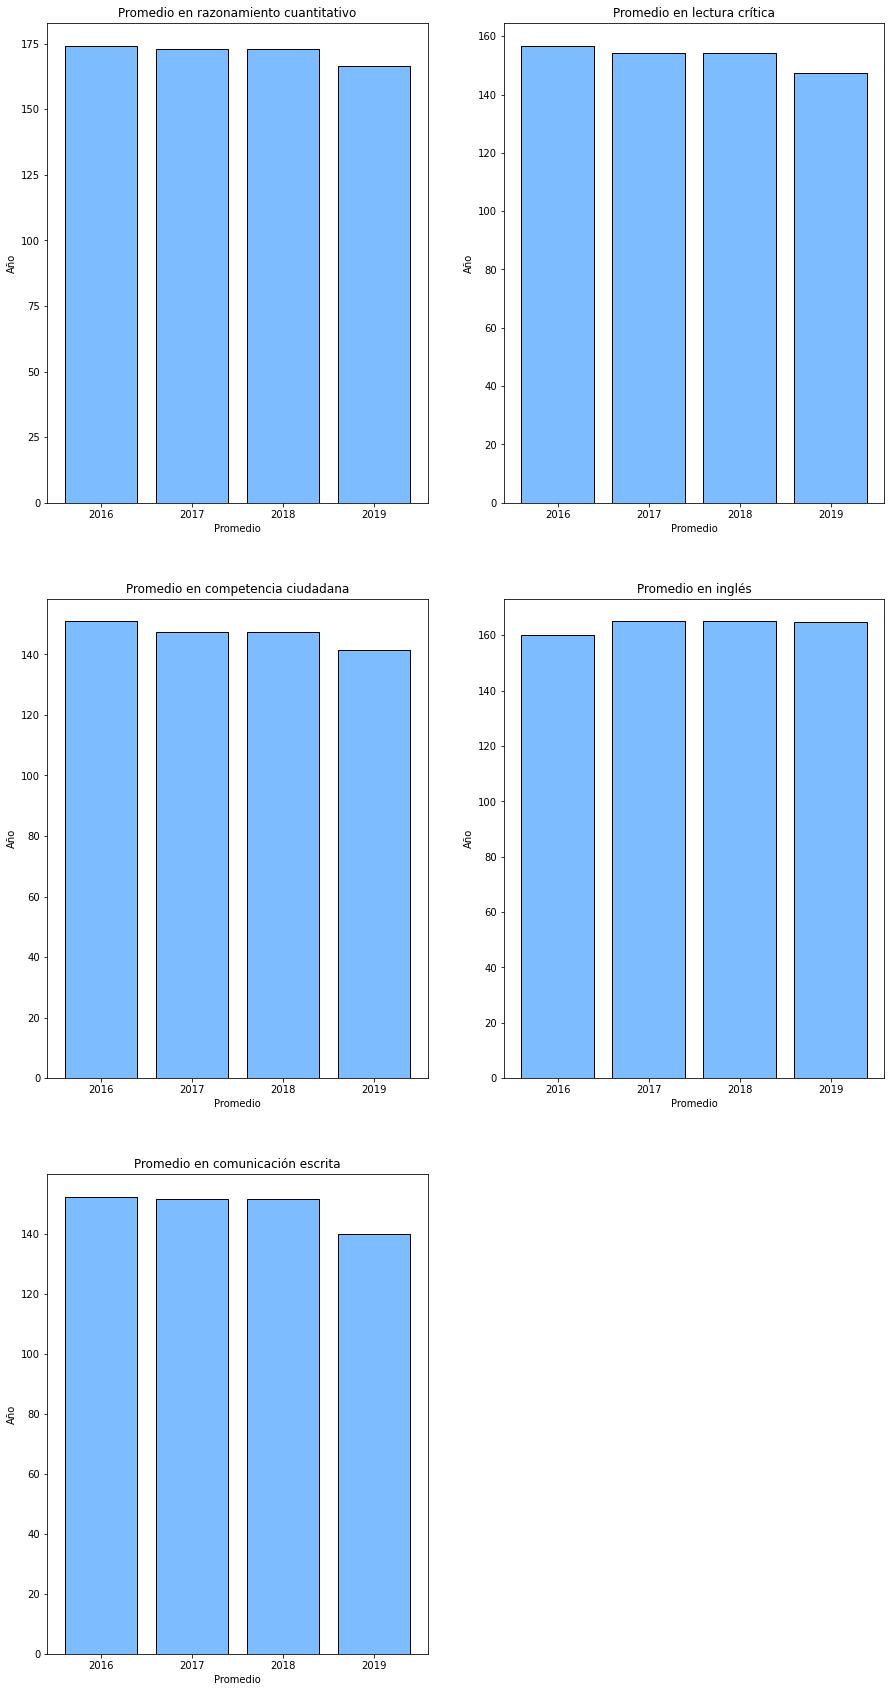

In [95]:
#Grafica de barras variable Razonamiento cuantitativo

def make_bar(titulo,x,y,row):
    #ax = plt.subplot(2,3,row)
    plt.title(titulo)
    plt.ylabel("Año")
    plt.xlabel("Promedio")
    plt.bar(['2016','2017','2018','2019'],y,edgecolor='black',color='#7CBCFF')
    #plt.show()
    #return plt

#plt.figure(figsize=(20,30 ))

fig=plt.figure(figsize=(15,30))


fig.add_subplot(3,2,1)
y = [p_raz_16,p_raz_17,p_raz_18,p_raz_19]
make_bar('Promedio en razonamiento cuantitativo',x,y,1)

fig.add_subplot(3,2,2)
y = [p_lec_16,p_lec_17,p_lec_18,p_lec_19]
make_bar('Promedio en lectura crítica',x,y,2)

fig.add_subplot(3,2,3)
y = [p_ciu_16,p_ciu_17,p_ciu_18,p_ciu_19]
make_bar('Promedio en competencia ciudadana',x,y,3)

fig.add_subplot(3,2,4)
y = [p_ing_16,p_ing_17,p_ing_17,p_ing_19]
make_bar('Promedio en inglés',x,y,4)

fig.add_subplot(3,2,5)
y = [p_com_16,p_com_17,p_com_18,p_com_19]
make_bar('Promedio en comunicación escrita',x,y,5)


<AxesSubplot:title={'center':'Promedios'}>

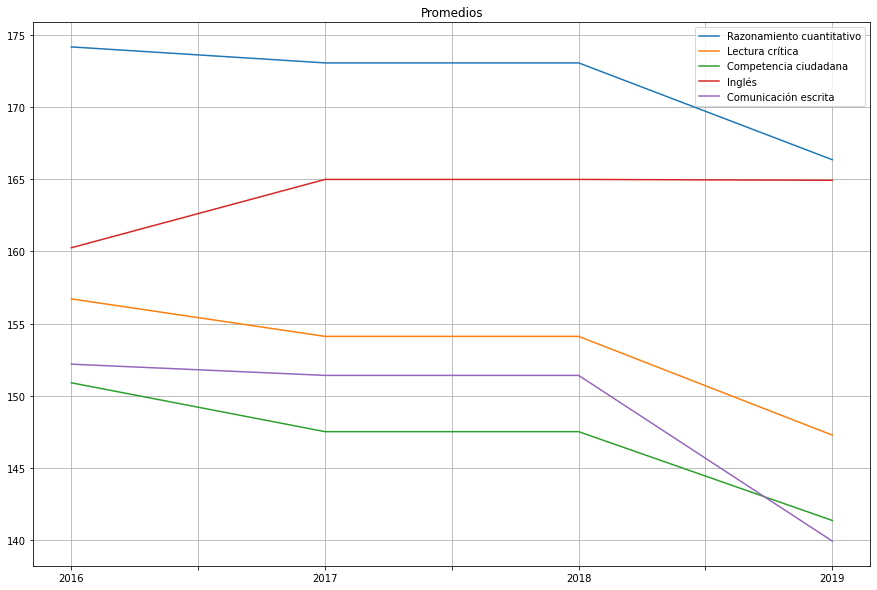

In [96]:
##################
x=['2016','2017','2018','2019']

y1 = [p_raz_16,p_raz_17,p_raz_18,p_raz_19]
y2 = [p_lec_16,p_lec_17,p_lec_18,p_lec_19]
y3 = [p_ciu_16,p_ciu_17,p_ciu_18,p_ciu_19]
y4 = [p_ing_16,p_ing_17,p_ing_18,p_ing_19]
y5 = [p_com_16,p_com_17,p_com_18,p_com_19]

s = pd.DataFrame(data={'Razonamiento cuantitativo':y1,'Lectura crítica':y2,'Competencia ciudadana':y3, 'Inglés':y4, 'Comunicación escrita':y5},index=x)
s.plot(kind='line',figsize=(15,10),grid=True,title='Promedios')
####################

## Gráfico de barras variables cualitativas

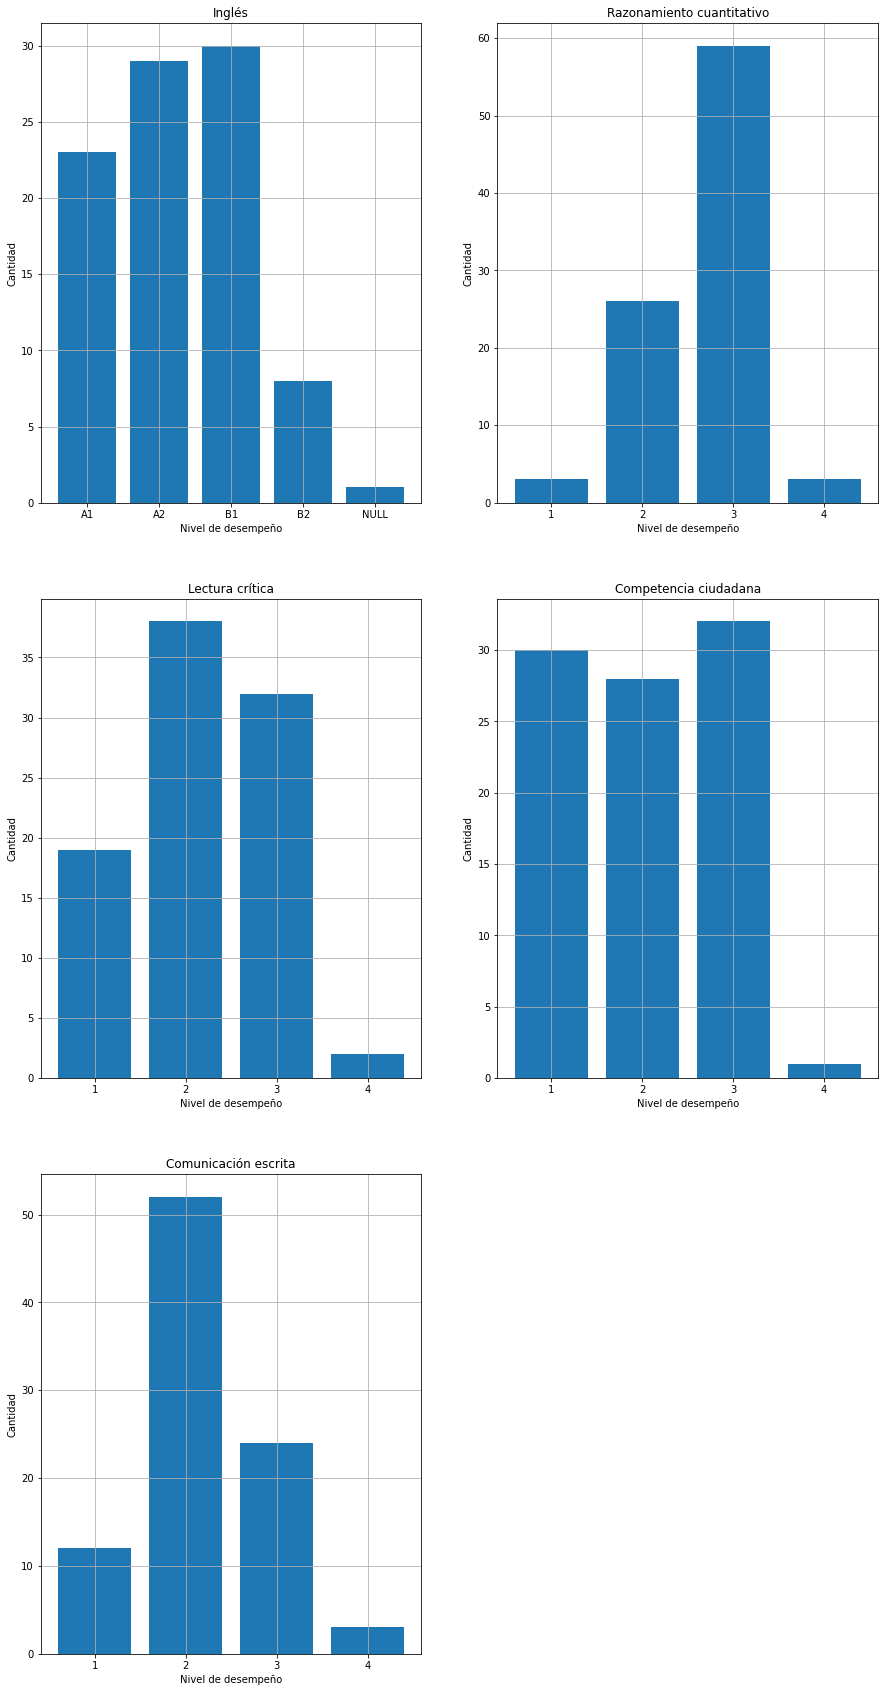

In [97]:
def make_bar_2(df,x,column_name,titulo):
    y = df.groupby([column_name])[column_name].count()

    plt.title(titulo)
    plt.ylabel("Cantidad")
    plt.xlabel("Nivel de desempeño")
    plt.bar(x,y)
    plt.grid(True)
    #plt.show()
    #return plt
    

fig=plt.figure(figsize=(15,30))

fig.add_subplot(3,2,1)    
x = ['A1','A2','B1','B2','NULL']
make_bar_2(df_2019,x,'MOD_INGLES_DESEM','Inglés')

fig.add_subplot(3,2,2)    
x = ['1','2','3','4']
make_bar_2(df_2019,x,'MOD_RAZONA_CUANTITAT_DESEM','Razonamiento cuantitativo')

fig.add_subplot(3,2,3)    
make_bar_2(df_2019,x,'MOD_LECTURA_CRITICA_DESEM','Lectura crítica')

fig.add_subplot(3,2,4)    
make_bar_2(df_2019,x,'MOD_COMPETEN_CIUDADA_DESEM','Competencia ciudadana')

fig.add_subplot(3,2,5)    
make_bar_2(df_2019,x,'MOD_COMUNI_ESCRITA_DESEM','Comunicación escrita')


## Histograma

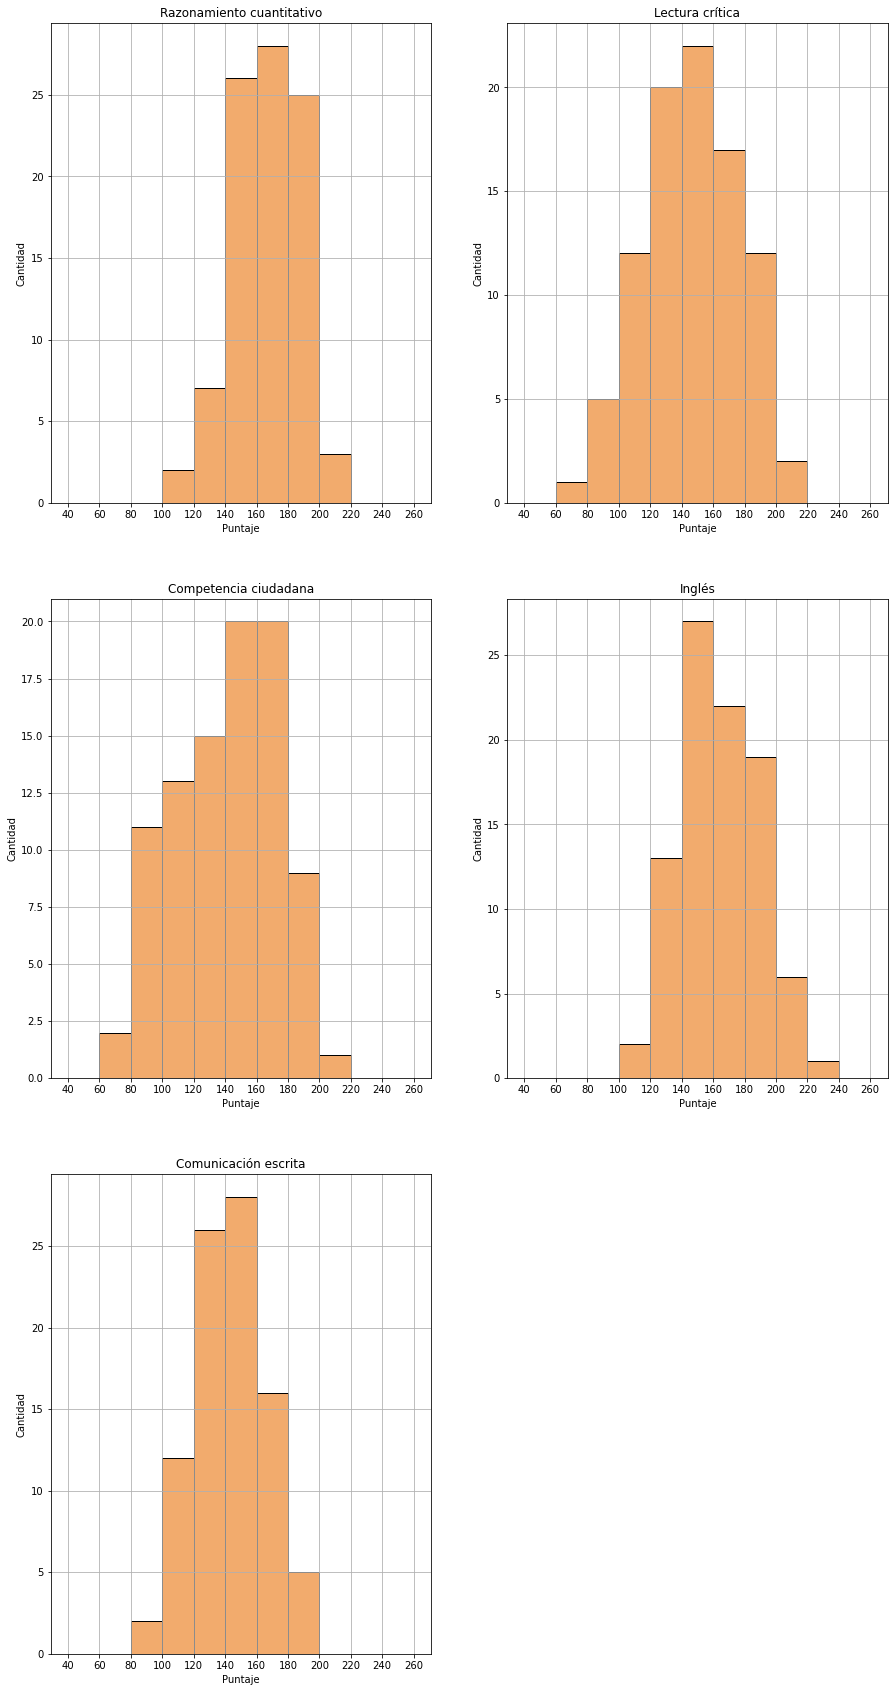

In [98]:
def make_hist(df,column_name,titulo):
    x = df[column_name]

    intervalos = [40,60,80,100,120,140,160,180,200,220,240,260]
    plt.hist(x=x,edgecolor='black', bins=intervalos, color='#F2AB6D', rwidth=50)
    plt.xticks(intervalos)
    plt.title(titulo)
    plt.grid(True)
    plt.xlabel('Puntaje')
    plt.ylabel('Cantidad')
    #plt.show()
    
    
    
fig=plt.figure(figsize=(15,30))

fig.add_subplot(3,2,1)
make_hist(df_2019,razonamiento,'Razonamiento cuantitativo')

fig.add_subplot(3,2,2)
make_hist(df_2019,lectura,'Lectura crítica')

fig.add_subplot(3,2,3)
make_hist(df_2019,ciudadana,'Competencia ciudadana')

fig.add_subplot(3,2,4)
make_hist(df_2019,ingles,'Inglés')

fig.add_subplot(3,2,5)
make_hist(df_2019,comunicacion,'Comunicación escrita')


## Boxplot

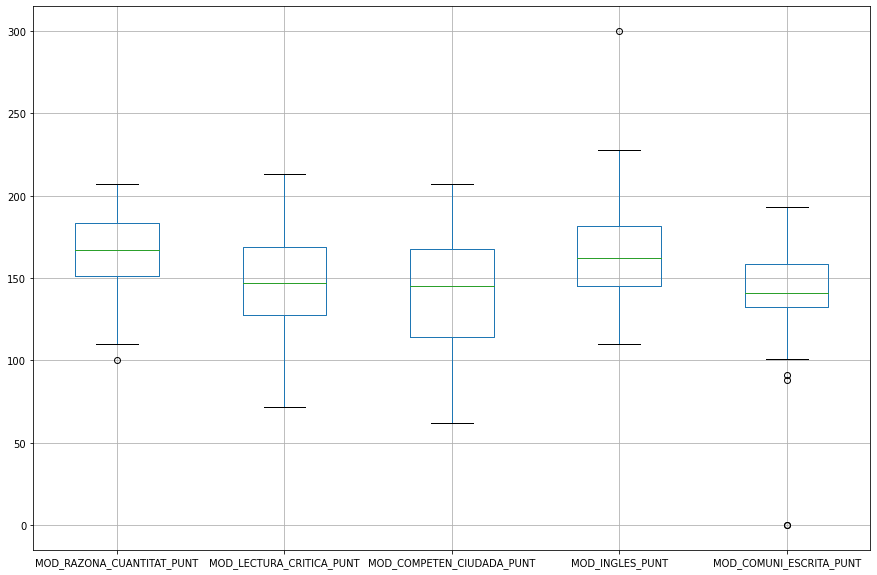

In [99]:
boxplot_2019= df_2019.boxplot(column=[razonamiento, lectura,ciudadana,ingles,comunicacion], figsize=(15,10))


## Gráfica de radar

In [100]:
p = pd.DataFrame(dict(r=[0,0,0,0,0],theta=['MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']))

fig=px.line_polar(p,r='r',theta='theta', line_close=True)
fig.show()

KeyError: 0

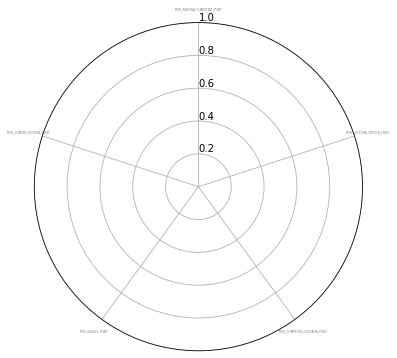

In [107]:
row=1
def make_spider(row,title,color):
    
    # number of variable
    categories=['MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(31,3,row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=3)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)
    
    # Ind1
    values=df.loc[row].drop(['MOD_RAZONA_CUANTITAT_DESEM','MOD_LECTURA_CRITICA_DESEM','MOD_COMPETEN_CIUDADA_DESEM','MOD_INGLES_DESEM','MOD_COMUNI_ESCRITA_DESEM']).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(title, size=15, color=color, y=1.1)
    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=216
plt.figure(figsize=(20,300 ))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

for row in range(0, len(df.index)):
    make_spider(row=row,title='Estudiante '+str(row + 1),color=my_palette(row))
    

In [24]:
#################################################################

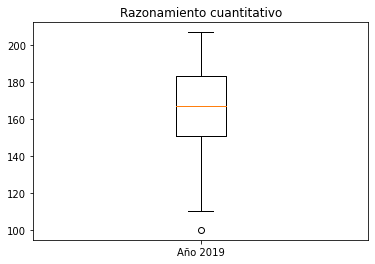

In [87]:
#Grafica de boxplot variable Razonamiento cuantitativo
y = df['MOD_RAZONA_CUANTITAT_PUNT'][0:91]

plt.boxplot(y)
plt.title('Razonamiento cuantitativo')
plt.xticks([1],['Año 2019'])
plt.show()




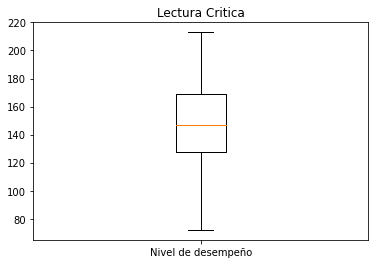

In [82]:
#Grafica de boxplot variable Lectura Critica
y = df['MOD_LECTURA_CRITICA_PUNT'][0:91]

plt.boxplot(y)
plt.title('Lectura Critica')
plt.xticks([1],['2019'])
plt.show()

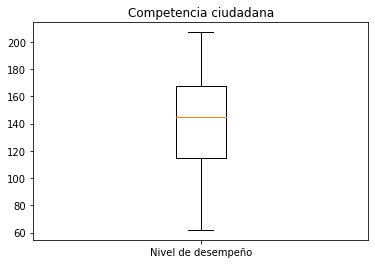

In [84]:
#Grafica de boxplot variable Competencia ciudadana
y = df['MOD_COMPETEN_CIUDADA_PUNT'][0:91]

plt.boxplot(y)
plt.title('Competencia ciudadana')
plt.xticks([1],['Nivel de desempeño'])
plt.show()

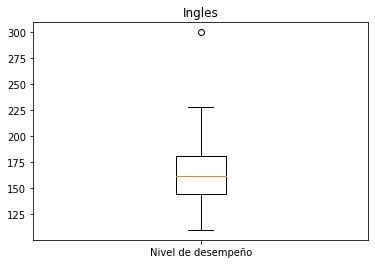

In [85]:
#Grafica de boxplot variable Ingles
y = df['MOD_INGLES_PUNT'][0:91]

plt.boxplot(y)
plt.title('Ingles')
plt.xticks([1],['Nivel de desempeño'])
plt.show()

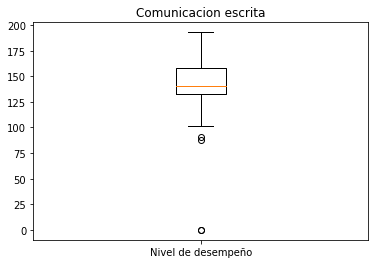

In [86]:
#Grafica de boxplot variable Comunicacion escrita
y = df['MOD_COMUNI_ESCRITA_PUNT'][0:91]

plt.boxplot(y)
plt.title('Comunicacion escrita')
plt.xticks([1],['Nivel de desempeño'])
plt.show()

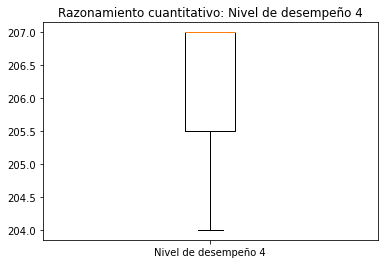

In [76]:
x = df.sort_values(['MOD_RAZONA_CUANTITAT_DESEM','MOD_RAZONA_CUANTITAT_PUNT']).groupby('MOD_RAZONA_CUANTITAT_DESEM').head(60)
y = x['MOD_RAZONA_CUANTITAT_PUNT'][88:91]

plt.boxplot(y)
plt.title('Razonamiento cuantitativo: Nivel de desempeño 4')
plt.xticks([1],['Nivel de desempeño 4'])
plt.show()

In [93]:
df.isnull().sum()

MOD_RAZONA_CUANTITAT_PUNT     0
MOD_RAZONA_CUANTITAT_DESEM    0
MOD_LECTURA_CRITICA_PUNT      0
MOD_LECTURA_CRITICA_DESEM     0
MOD_COMPETEN_CIUDADA_PUNT     0
MOD_COMPETEN_CIUDADA_DESEM    0
MOD_INGLES_PUNT               1
MOD_INGLES_DESEM              0
MOD_COMUNI_ESCRITA_PUNT       0
MOD_COMUNI_ESCRITA_DESEM      2
dtype: int64

In [34]:
df.isnull().sum()

MOD_RAZONA_CUANTITAT_PUNT     0
MOD_RAZONA_CUANTITAT_DESEM    0
MOD_LECTURA_CRITICA_PUNT      0
MOD_LECTURA_CRITICA_DESEM     0
MOD_COMPETEN_CIUDADA_PUNT     0
MOD_COMPETEN_CIUDADA_DESEM    0
MOD_INGLES_PUNT               0
MOD_INGLES_DESEM              0
MOD_COMUNI_ESCRITA_PUNT       0
MOD_COMUNI_ESCRITA_DESEM      0
dtype: int64

In [81]:
#theta=['MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT']
#r=df.iloc[1,[0,2,4,6,8]]



#plt.subplot(2,2,1)
#plt.plot(fig)

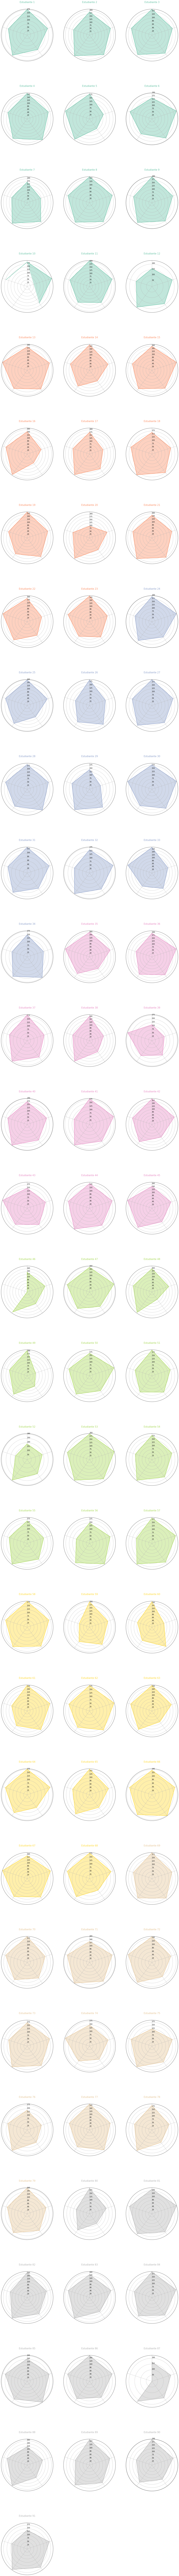

In [63]:
df.loc[90].drop(['MOD_RAZONA_CUANTITAT_DESEM','MOD_LECTURA_CRITICA_DESEM','MOD_COMPETEN_CIUDADA_DESEM','MOD_INGLES_DESEM','MOD_COMUNI_ESCRITA_DESEM'])
#.drop([]).values.flatten().tolist()

MOD_RAZONA_CUANTITAT_PUNT      139
MOD_LECTURA_CRITICA_PUNT       172
MOD_COMPETEN_CIUDADA_PUNT      169
MOD_INGLES_PUNT              189.0
MOD_COMUNI_ESCRITA_PUNT        120
Name: 90, dtype: object

In [8]:
len(df.index)
df

MOD_RAZONA_CUANTITAT_PUNT  MOD_RAZONA_CUANTITAT_DESEM  \
0                         178                           3   
1                         191                           3   
2                         153                           2   
3                         171                           3   
4                         184                           3   
..                        ...                         ...   
86                        167                           3   
87                        120                           1   
88                        154                           3   
89                        198                           3   
90                        139                           2   

    MOD_LECTURA_CRITICA_PUNT  MOD_LECTURA_CRITICA_DESEM  \
0                        149                          2   
1                        182                          3   
2                        128                          2   
3                        150                          2   
4                        108                          1   
..                       ...                        ...   
86                       172                          3   
87                       107                          1   
88                       130                          2   
89                       172                          3   
90                       172                          3   

    MOD_COMPETEN_CIUDADA_PUNT  MOD_COMPETEN_CIUDADA_DESEM  MOD_INGLES_PUNT  \
0                         124                           1            173.0   
1                         199                           3            211.0   
2                         133                           2            143.0   
3                         173                           3            162.0   
4                          89                           1            187.0   
..                        ...                         ...              ...   
86                        178                           3            215.0   
87                         99                           1            167.0   
88                        132                           2            149.0   
89                        137                           2            165.0   
90                        169                           3            189.0   

   MOD_INGLES_DESEM  MOD_COMUNI_ESCRITA_PUNT  MOD_COMUNI_ESCRITA_DESEM  
0                B1                      138                       2.0  
1                B2                      139                       2.0  
2                A1                      129                       2.0  
3                A2                      136                       2.0  
4                B1                      188                       4.0  
..              ...                      ...                       ...  
86               B2                        0                       NaN  
87               A2                      138                       2.0  
88               A2                       91                       1.0  
89               A2                      127                       2.0  
90               B1                      120                       2.0  

[91 rows x 10 columns]

In [37]:
#x= df['MOD_RAZONA_CUANTITAT_DESEM']
#x.groupby(['MOD_RAZONA_CUANTITAT_DESEM']).sum()
#x.groupby(['MOD_RAZONA_CUANTITAT_DESEM']).sum()
#df.groupby(['MOD_RAZONA_CUANTITAT_DESEM']).sum()
x=df.groupby(['MOD_RAZONA_CUANTITAT_DESEM'])['MOD_RAZONA_CUANTITAT_DESEM'].count();
x

MOD_RAZONA_CUANTITAT_DESEM
1     3
2    26
3    59
4     3
Name: MOD_RAZONA_CUANTITAT_DESEM, dtype: int64

['A1', 'A2', 'B1', 'B2', '_A'] MOD_INGLES_DESEM
A1    23
A2    29
B1    30
B2     8
_A     1
Name: MOD_INGLES_DESEM, dtype: int64


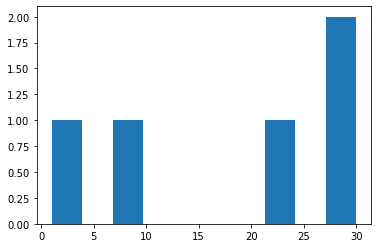

In [51]:
#

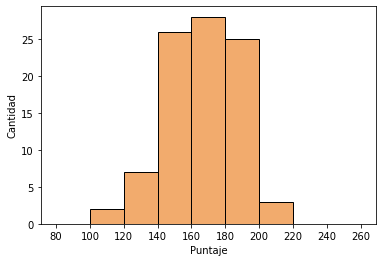

In [78]:
x = df['MOD_RAZONA_CUANTITAT_PUNT']

intervalos = [80,100,120,140,160,180,200,220,240,260]
plt.hist(x=x,edgecolor='black', bins=intervalos, color='#F2AB6D', rwidth=50)
plt.xticks(intervalos)
plt.xlabel('Puntaje')
plt.ylabel('Cantidad')
plt.show()


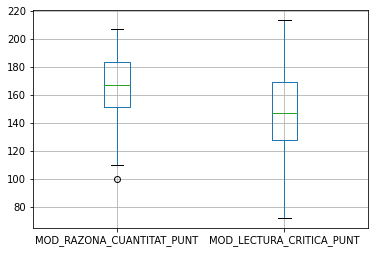

In [12]:
boxplot= df_2019.boxplot(column=[razonamiento, lectura])

<AxesSubplot:>

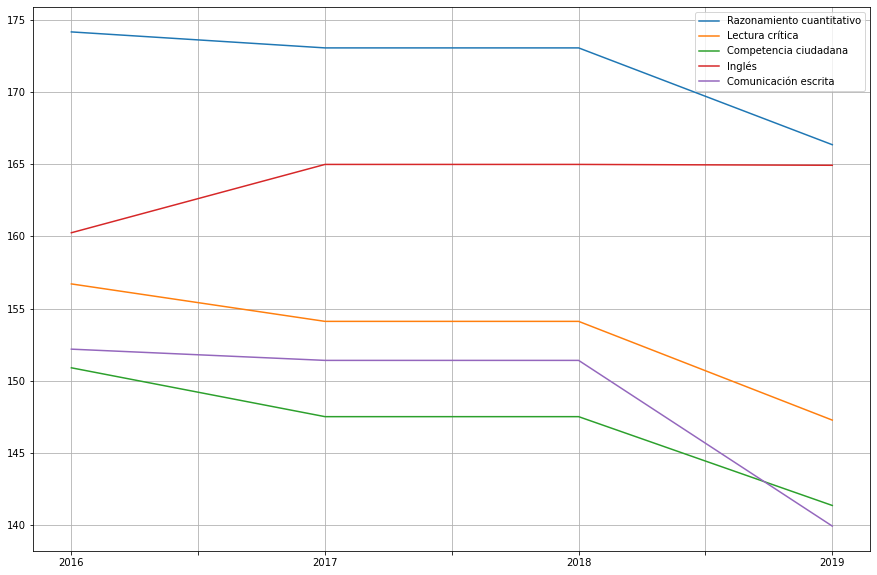

In [103]:
x=['2016','2017','2018','2019']

y1 = [p_raz_16,p_raz_17,p_raz_18,p_raz_19]
y2 = [p_lec_16,p_lec_17,p_lec_18,p_lec_19]
y3 = [p_ciu_16,p_ciu_17,p_ciu_18,p_ciu_19]
y4 = [p_ing_16,p_ing_17,p_ing_18,p_ing_19]
y5 = [p_com_16,p_com_17,p_com_18,p_com_19]

s = pd.DataFrame(data={'Razonamiento cuantitativo':y1,'Lectura crítica':y2,'Competencia ciudadana':y3, 'Inglés':y4, 'Comunicación escrita':y5},index=x)
s.plot(kind='line',figsize=(15,10),grid=True)
